In [1]:
import pandas as pd
import json
import re
import numpy as np
import os


Prior to parsing, spurious responses were purged on the basis of:

All extreme values
Inappropriate comments
Non-target user profile

## Data parsing

In [2]:
# Loading Data
RESULTS_FILEPATH = "db_06_07_21_resp.json"
figure_save_dir = os.path.splitext(RESULTS_FILEPATH)[0]

with open(RESULTS_FILEPATH) as f:
    # remove image0/image1 vars since it prevents proper df merging
    g = re.sub(r"_image[0-3]", "", f.read())
    data = json.loads(g)
    df = pd.json_normalize(data)
    df.drop(labels=["__v", "_id.$oid"], axis=1, inplace=True)

# hacky solution to remove the panda-appended user_. entry
renamed = [name.split("_.")[-1] for name in df.columns]
col_rename = {i: j for i, j in zip(df.columns, renamed)}
df = df.rename(columns=col_rename)

df.loc[[0]]


,id,userProfiling_age,userProfiling_position,userProfiling_useOfAI,userProfiling_useOfDP,userProfiling_mlFamiliarity,saliencyMaps_globalSaliency_understandability,saliencyMaps_globalSaliency_usability,saliencyMaps_globalSaliency_informativeness,saliencyMaps_globalSaliency_value,...,userProfiling_useOfAI_details,saliencyMaps_globalSaliency_comments,saliencyMaps_localSaliency_comments,conceptAttribution_textAttributes_comments,trustScores_borderlineCases_comments,userProfiling_aiFamiliarity,userProfiling_comments,counterfactuals_twoAxisCounterfactuals_comments,counterfactuals_prototypeInterpolation_comments,userProfiling_position-Comment
0,1.623319e+12,30-40,Assisting physician (Assistenzarzt) for pathol...,in routine diagnostics,in routine diagnostics,1,5,5,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
user_df = df[
    [
        "userProfiling_age",
        "userProfiling_position",
        "userProfiling_useOfDP",
        "userProfiling_useOfAI",
        "userProfiling_useOfAI_details",
        "userProfiling_mlFamiliarity",
    ]
]

fields = ["Understandability", "Usability", "Informativeness", "Value"]

instance_identifiers = {
    "Counterfactuals: Single axis": "counterfactuals_prototypeInterpolation",
    "Counterfactuals: Two axes": "counterfactuals_twoAxisCounterfactuals",
    "Saliency Maps: Local": "saliencyMaps_localSaliency",
    "Saliency Maps: Global": "saliencyMaps_globalSaliency",
    "Concept Attribution: Text": "conceptAttribution_textAttributes",
    "Prototypes: Highest confidence": "prototypes_prototypes",
    "Trust Scores: Borderline Cases": "trustScores_borderlineCases",
}

result_dataframes = dict()
comments = dict()
for name, id_ in instance_identifiers.items():
    result_dataframes[name] = df[[f"{id_}_{field.lower()}" for field in fields]]
    result_dataframes[name].columns = fields

    comments_column = f"{id_}_comments"
    if comments_column in df.columns:
        comments[name] = df[[comments_column]].dropna().values.squeeze(axis=1).tolist()
    else:
        comments[name] = []

result_dataframes["Counterfactuals: Single axis"]


,Understandability,Usability,Informativeness,Value
0,6,6,7,6
1,7,7,7,7
2,4,6,4,5
3,6,4,5,5
4,3,2,2,1
5,7,7,7,7
6,2,2,2,2
7,7,4,6,5
8,5,6,5,5
9,6,6,5,5


In [4]:
comments


{'Counterfactuals: Single axis': ["Like previous, initial reaction is that interpolation is useful but doesn't give the full picture of possible negatives. Perhaps clicking around each cell and seeing the interpolation for each would feel more useful",
  'What is a counterfactual? '],
 'Counterfactuals: Two axes': ['It seems there may be many counterfactual examples that are more closely related to the positive example which could be useful for understanding the nuances and building trust',
  'Do not understand this question'],
 'Saliency Maps: Local': ['Per-cell saliency is probably too much detail. '],
 'Saliency Maps: Global': ['There is one cell slightly to the right of the center that is labeled as positive and is quite darkly stained by IHC, but does not show up on the saliency map, which is a bit surprising. It looks like an endothelial cell. '],
 'Concept Attribution: Text': ['This is excellent but I think there could be quite a lot of additional factors, so this would need som

In [5]:
user_df


,userProfiling_age,userProfiling_position,userProfiling_useOfDP,userProfiling_useOfAI,userProfiling_useOfAI_details,userProfiling_mlFamiliarity
0,30-40,Assisting physician (Assistenzarzt) for pathol...,in routine diagnostics,in routine diagnostics,NaN,1
1,41-50,Researcher in pathology/neuropathology,in research,in research,"from MindPeak (BreastIHC), from VMscope (Cogni...",3
2,30-40,Researcher in pathology/neuropathology,[in research],[in research],NaN,7
3,41-50,Technician (MTA) for pathology/neuropathology,[in research],[in routine diagnostics],NaN,7
4,30-40,Trainee (Assistenzarzt) in pathology/neuropath...,[in research],[in research],QuPath immunohistochemistry positive cell dete...,2
5,30-40,Consultant (Facharzt) for pathology/neuropatho...,[in research],[in research],Aiforia,7
6,51-60,Researcher in pathology/neuropathology,[none],[none],NaN,2
7,41-50,Consultant (Facharzt) for pathology/neuropatho...,[in routine diagnostics],[none],NaN,4
8,41-50,Consultant (Facharzt) for pathology/neuropatho...,[none],[none],NaN,5
9,51-60,Consultant (Facharzt) for pathology/neuropatho...,"[in research, in routine diagnostics]","[in routine diagnostics, in research]",Roche Diagnostics,4


## Stacked diverging bar charts

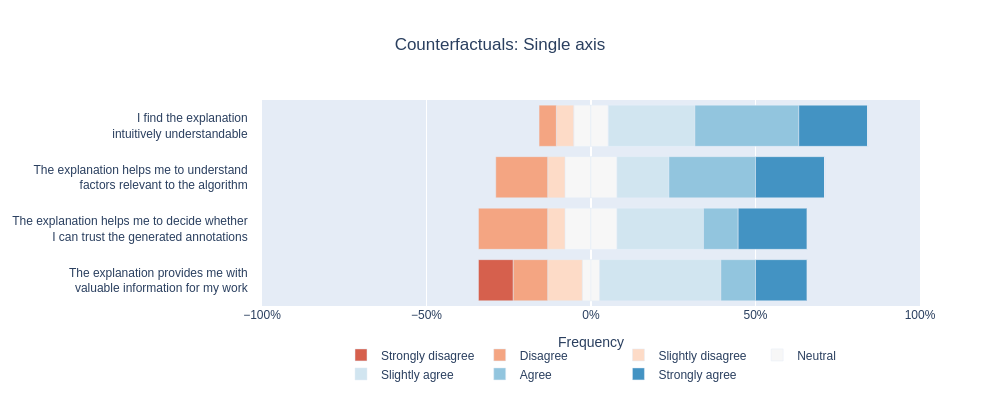

Like previous, initial reaction is that interpolation is useful but doesn't give the full picture of possible negatives. Perhaps clicking around each cell and seeing the interpolation for each would feel more useful
What is a counterfactual? 


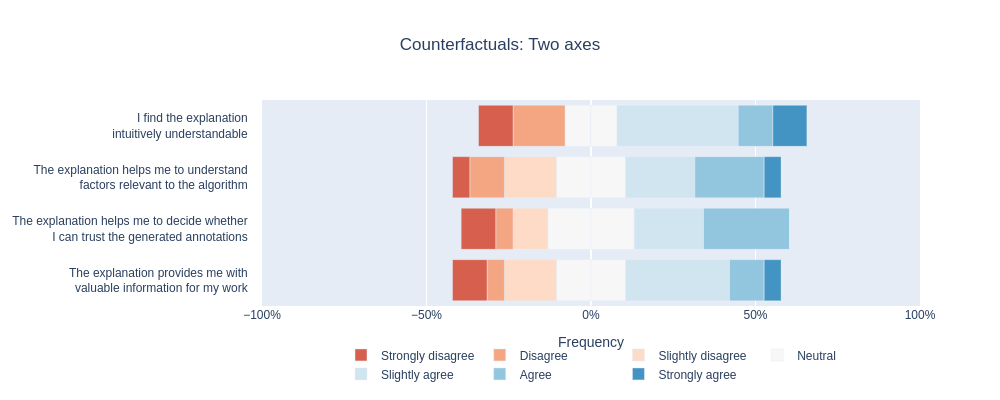

It seems there may be many counterfactual examples that are more closely related to the positive example which could be useful for understanding the nuances and building trust
Do not understand this question


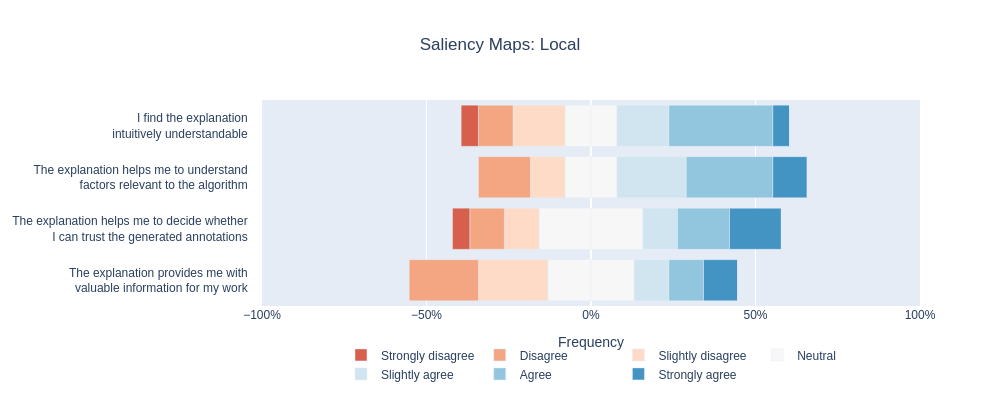

Per-cell saliency is probably too much detail. 


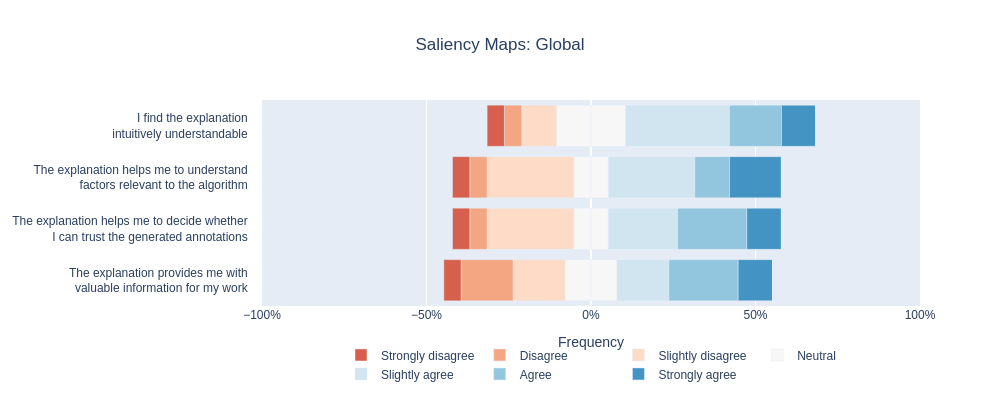

There is one cell slightly to the right of the center that is labeled as positive and is quite darkly stained by IHC, but does not show up on the saliency map, which is a bit surprising. It looks like an endothelial cell. 


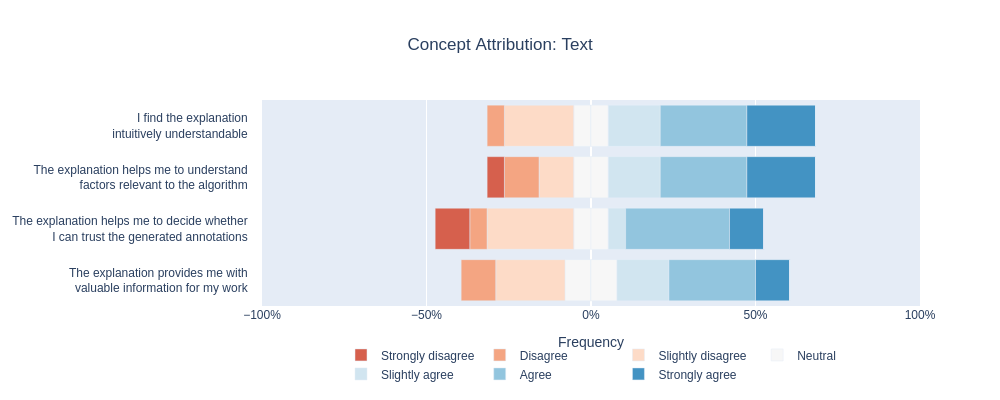

This is excellent but I think there could be quite a lot of additional factors, so this would need some supervision. 


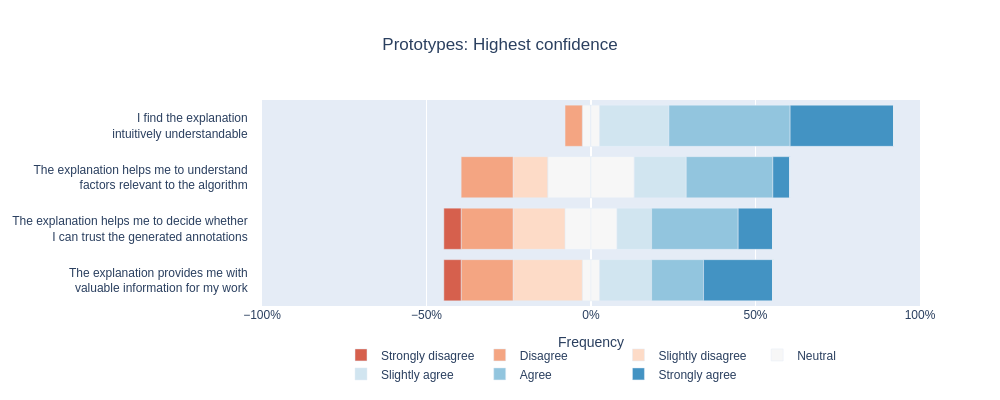

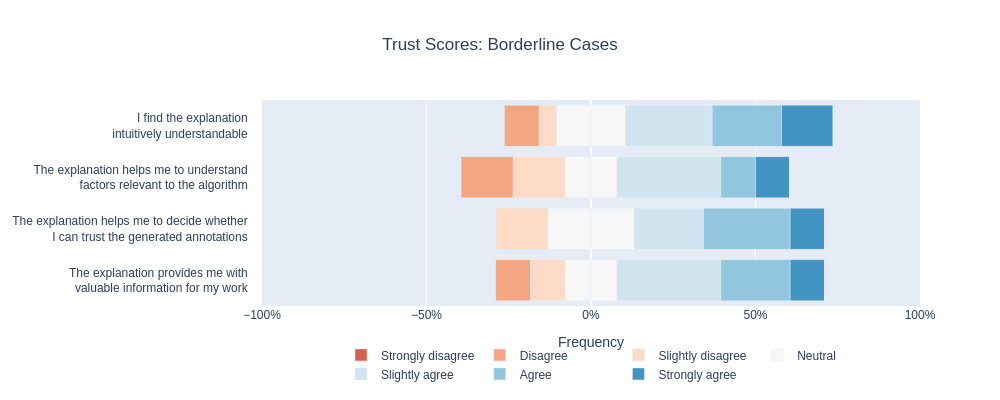

High confidence should provide examples of both classes (pos. and neg.), no? 
Confidence for what? positive or negative or both?
I felt I needed the pos or neg labels in addition to the confidence


In [15]:
from typing import Optional
from collections import Counter

import plotly
import plotly.graph_objects as go

from PIL import Image
import io
from IPython.display import display

def plotly_figure_to_image(fig, extension: str = 'png', **kwargs):
    img_bytes = fig.to_image(format=extension, **kwargs)
    return Image.open(io.BytesIO(img_bytes))

def save_image(image, name: str, save_dir: str = "images", extension: str="png"):
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    filename = "".join(i for i in name if i not in "\\/:*?<>|")
    filepath = f"{save_dir}/{filename}.{extension}"
    image.save(filepath)

def stackedBarChartDF(
    df: pd.DataFrame,
    title: str,
    palette: list,
    attributes: list = ["Understandability", "Usability", "Informativeness", "Value"],
    labels: Optional[list] = None,
    save_fig: bool = False,
    save_dir: str = "images",
):
    counters = [Counter(df[attribute]) for attribute in attributes]

    fig = go.Figure()  # type: ignore

    category_order = [
        "Strongly disagree",
        "Disagree",
        "Slightly disagree",
        "Neutral",
        "Slightly agree",
        "Agree",
        "Strongly agree",
    ]

    number_order = [1, 2, 3, 4, 5, 6, 7]

    labels = labels if labels else attributes

    def add_bar_trace(num, transform, showlegend: bool = True):
        rating = number_order[num]
        counts = [counter[rating] for counter in counters]
        total_count = sum(counters[0].values())

        xvals = [transform(count) / total_count for count in counts]

        fig.add_trace(
            go.Bar(
                x=xvals,
                y=labels,
                orientation="h",
                name=category_order[num],
                width=0.8,
                marker_color=palette[num],
                showlegend=False,
            )  # type: ignore
        )

    # negative side
    add_bar_trace(3, lambda x: x * -0.5)
    for num in reversed(range(0, 3)):
        add_bar_trace(num, lambda x: x * -1)

    # positive side
    add_bar_trace(3, lambda x: x * 0.5, showlegend=False)
    for num in range(4, 7):
        add_bar_trace(num, lambda x: x)

    for num in range(0, 7):
        fig.add_trace(
            go.Bar(
                x=[0] * 7,
                y=labels,
                orientation="h",
                name=category_order[num],
                marker_color=palette[num],
            )  # type: ignore
        )
    fig.update_layout(
        barmode="relative",
        yaxis_autorange="reversed",
        title=title,
        title_x=0.5,
        xaxis={"tick0": 0, "title": "Frequency", "tickformat": "%", "range": [-1, 1]},
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.4,
            xanchor="center",
            x=0.5,
        ),
    )
    im = plotly_figure_to_image(fig, width=1000, height=400)
    display(im)

    if save_fig:
        save_image(im, name, save_dir)


palette = [plotly.colors.diverging.RdBu[n] for n in [2, 3, 4, 5, 6, 7, 8]]  # type: ignore
space = " " * 4
labels = [
    f"I find the explanation{space}<br>intuitively understandable{space}",
    f"The explanation helps me to understand{space}<br>factors relevant to the algorithm{space}",
    f"The explanation helps me to decide whether{space}<br> I can trust the generated annotations{space}",
    f"The explanation provides me with{space}<br>valuable information for my work{space}",
]

for name, df in result_dataframes.items():
    stackedBarChartDF(
        df,
        name,
        palette,
        labels=labels,
        save_fig=True,
        save_dir=figure_save_dir,
    )
    for comment in comments[name]:
        print(comment)


## Overall comparison

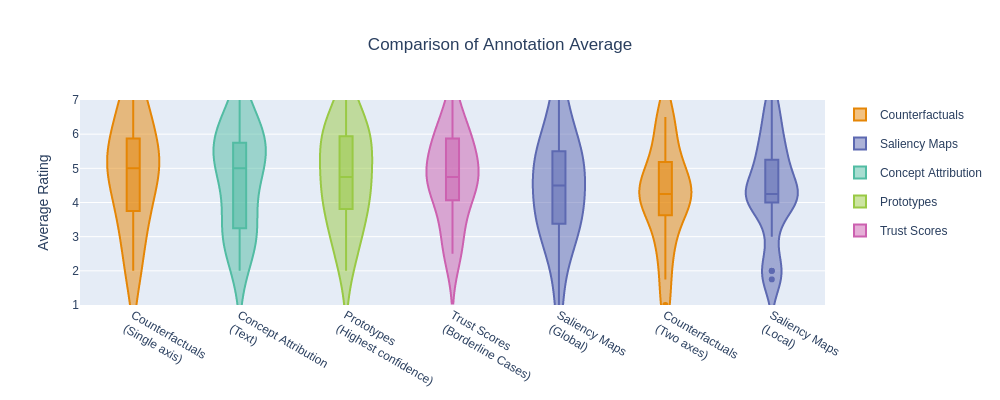

In [18]:
import plotly.express as px

from typing import Callable

dfFilter = Optional[Callable[[pd.DataFrame], pd.DataFrame]]


def boxPlotDF(
    df: pd.DataFrame,
    title: str,
    palette: list,
    results_filter: dfFilter = None,
    save_fig: bool = False,
    save_dir: str = "images",
):

    df = df[results_filter(df)] if results_filter else df

    explanation_classes = [
        "Counterfactuals",
        "Saliency Maps",
        "Concept Attribution",
        "Prototypes",
        "Trust Scores",
    ]

    color_dict = {
        explanation_class: palette[idx]
        for idx, explanation_class in enumerate(explanation_classes)
    }

    columns = (column for column in df if column in instance_identifiers)

    results_only_df = df[[column for column in columns]]
    sorted_index = results_only_df.median().sort_values(ascending=False).index
    results_only_df = df[sorted_index]

    fig = go.Figure()  # type: ignore
    for column in results_only_df:
        split_column = column.split(": ")
        explanation_class = split_column[0]
        column_name = f"{explanation_class}<br>({split_column[1]})"
        fig.add_trace(
            go.Violin(
                y=df[column],
                name=column_name,
                box_visible=True,
                marker_color=color_dict[explanation_class],
                legendgroup=explanation_class,
                showlegend=False,
            )  # type: ignore
        )

    # Legend
    for explanation_class in explanation_classes:
        fig.add_trace(
            go.Violin(
                y=[None],
                name=explanation_class,
                marker_color=color_dict[explanation_class],
                legendgroup=explanation_class,
                showlegend=True,
            )  # type: ignore
        )

    fig.update_layout(
        title=title,
        title_x=0.5,
        yaxis=dict(dtick=1),
        yaxis_range=[1, 7],
        yaxis_title="Average Rating",
        showlegend=True,
    )

    im = plotly_figure_to_image(fig, width=1000, height=400)
    display(im)

    if save_fig:
        save_image(im, name, save_dir)


aggregated_df = pd.DataFrame()
for name, df in result_dataframes.items():
    aggregated_df[name] = df.mean(axis=1)

full_df = user_df.join(aggregated_df)

boxPlotDF(
    full_df, "Comparison of Annotation Average", 
    plotly.colors.qualitative.Vivid, # type: ignore
    save_fig=True, 
    save_dir=figure_save_dir
    )  


In [ ]:
full_df[full_df.userProfiling_position.str.startswith("Consultant")]


,userProfiling_age,userProfiling_position,userProfiling_useOfDP,userProfiling_useOfAI,userProfiling_useOfAI_details,userProfiling_mlFamiliarity,Counterfactuals: Single axis,Counterfactuals: Two axes,Saliency Maps: Local,Saliency Maps: Global,Concept Attribution: Text,Prototypes: Highest confidence,Trust Scores: Borderline Cases
5,30-40,Consultant (Facharzt) for pathology/neuropatho...,[in research],[in research],Aiforia,7,7.00,6.50,5.25,5.50,6.25,6.50,6.00
7,41-50,Consultant (Facharzt) for pathology/neuropatho...,[in routine diagnostics],[none],NaN,4,5.50,4.00,1.75,1.00,2.75,4.00,2.50
8,41-50,Consultant (Facharzt) for pathology/neuropatho...,[none],[none],NaN,5,5.25,4.00,4.00,2.50,3.00,5.00,6.00
9,51-60,Consultant (Facharzt) for pathology/neuropatho...,"[in research, in routine diagnostics]","[in routine diagnostics, in research]",Roche Diagnostics,4,5.50,5.25,7.00,5.50,5.00,5.50,4.25
10,41-50,Consultant (Facharzt) for pathology/neuropatho...,[none],[none],NaN,5,5.00,5.00,2.00,4.00,4.00,2.00,4.50
11,30-40,Consultant (Facharzt) for pathology/neuropatho...,"[in routine diagnostics, in research]","[in routine diagnostics, in research]",tumor cellularity count; pattern recognition; ...,2,3.75,4.50,4.25,4.00,5.25,3.00,4.75
18,41-50,Consultant (Fachärztin*arzt) for pathology/neu...,[in research],[in research],Metastases detection in lymph nodes,6,7.00,4.25,5.75,5.75,5.25,4.25,7.00


In [ ]:
import plotly.express as px

full_df[]


SyntaxError: invalid syntax (<ipython-input-9-1ede0668b4e1>, line 3)

## User profiling

In [ ]:
user_df


,userProfiling_age,userProfiling_position,userProfiling_useOfDP,userProfiling_useOfAI,userProfiling_useOfAI_details,userProfiling_mlFamiliarity
0,30-40,Assisting physician (Assistenzarzt) for pathol...,in routine diagnostics,in routine diagnostics,NaN,1
1,41-50,Researcher in pathology/neuropathology,in research,in research,"from MindPeak (BreastIHC), from VMscope (Cogni...",3
2,30-40,Researcher in pathology/neuropathology,[in research],[in research],NaN,7
3,41-50,Technician (MTA) for pathology/neuropathology,[in research],[in routine diagnostics],NaN,7
4,30-40,Trainee (Assistenzarzt) in pathology/neuropath...,[in research],[in research],QuPath immunohistochemistry positive cell dete...,2
5,30-40,Consultant (Facharzt) for pathology/neuropatho...,[in research],[in research],Aiforia,7
6,51-60,Researcher in pathology/neuropathology,[none],[none],NaN,2
7,41-50,Consultant (Facharzt) for pathology/neuropatho...,[in routine diagnostics],[none],NaN,4
8,41-50,Consultant (Facharzt) for pathology/neuropatho...,[none],[none],NaN,5
9,51-60,Consultant (Facharzt) for pathology/neuropatho...,"[in research, in routine diagnostics]","[in routine diagnostics, in research]",Roche Diagnostics,4
